<a href="https://colab.research.google.com/github/kashifkhan9555/Logistic-Regression-implement/blob/main/Logistic_Regression_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data Pre-procesing Step
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/drive/MyDrive/datasets/User_Data (1).csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

In [4]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [5]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

## 2. Fitting Logistic Regression to the Training set:

We have well prepared our dataset, and now we will train the dataset using the training set. For providing training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

After importing the class, we will create a classifier object and use it to fit the model to the logistic regression. Below is the code for it:

In [6]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [7]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
# Hence our model is well fitted to the training set.

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

## 3. Predicting the Test Result

Our model is well trained on the training set, so we will now predict the result by using test set data. Below is the code for it:

In [8]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
# In the above code, we have created a y_pred vector to predict the test set result.

## 4. Test Accuracy of the result

Now we will create the confusion matrix here to check the accuracy of the classification. To create it, we need to import the confusion_matrix function of the sklearn library. After importing the function, we will call it using a new variable cm. The function takes two parameters, mainly y_true( the actual values) and y_pred (the targeted value return by the classifier). Below is the code for it:

In [10]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix using the actual and predicted values
cm = confusion_matrix(y_test, y_pred)


## 5. Visualizing the training set result

Finally, we will visualize the training set result. To visualize the result, we will use ListedColormap class of matplotlib library. Below is the code for it:

<ipython-input-19-9577ad09de02>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


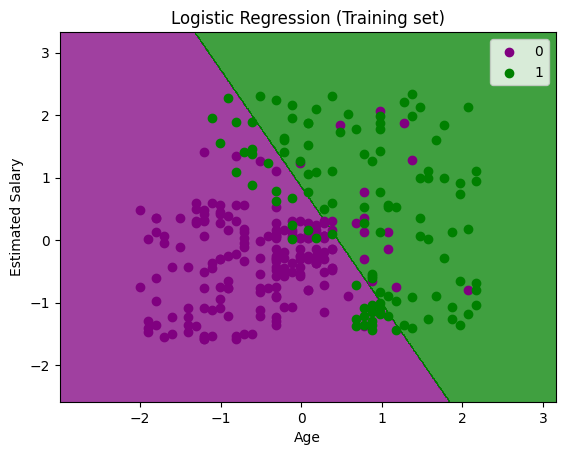

In [19]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Logistic Regression (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()






In the above code, we have imported the ListedColormap class of Matplotlib library to create the colormap for visualizing the result. We have created two new variables x_set and y_set to replace x_train and y_train. After that, we have used the nm.meshgrid command to create a rectangular grid, which has a range of -1(minimum) to 1 (maximum). The pixel points we have taken are of 0.01 resolution.

To create a filled contour, we have used mtp.contourf command, it will create regions of provided colors (purple and green). In this function, we have passed the classifier.predict to show the predicted data points predicted by the classifier.

The graph can be explained in the below points:

In the above graph, we can see that there are some Green points within the green region and Purple points within the purple region.
All these data points are the observation points from the training set, which shows the result for purchased variables.
This graph is made by using two independent variables i.e., Age on the x-axis and Estimated salary on the y-axis.
The purple point observations are for which purchased (dependent variable) is probably 0, i.e., users who did not purchase the SUV car.
The green point observations are for which purchased (dependent variable) is probably 1 means user who purchased the SUV car.
We can also estimate from the graph that the users who are younger with low salary, did not purchase the car, whereas older users with high estimated salary purchased the car.
But there are some purple points in the green region (Buying the car) and some green points in the purple region(Not buying the car). So we can say that younger users with a high estimated salary purchased the car, whereas an older user with a low estimated salary did not purchase the car.

**### The goal of the classifier:**

We have successfully visualized the training set result for the logistic regression, and our goal for this classification is to divide the users who purchased the SUV car and who did not purchase the car. So from the output graph, we can clearly see the two regions (Purple and Green) with the observation points. The Purple region is for those users who didn't buy the car, and Green Region is for those users who purchased the car.

**### Linear Classifier:**

As we can see from the graph, the classifier is a Straight line or linear in nature as we have used the Linear model for Logistic Regression. In further topics, we will learn for non-linear Classifiers.

**### Visualizing the test set result:**

Our model is well trained using the training dataset. Now, we will visualize the result for new observations (Test set). The code for the test set will remain same as above except that here we will use x_test and y_test instead of x_train and y_train. Below is the code for it:

<ipython-input-20-04fe1dfc5087>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


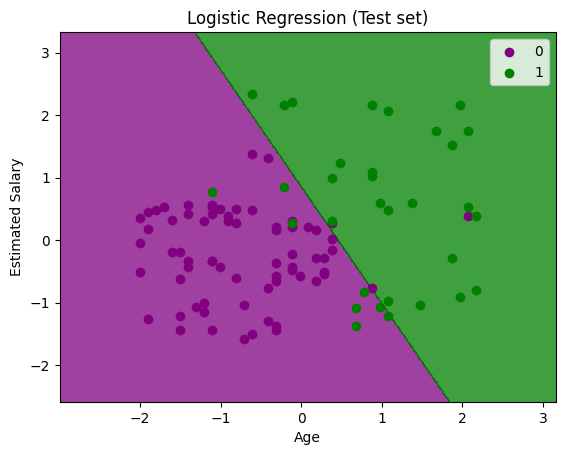

In [20]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Logistic Regression (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

The above graph shows the test set result. As we can see, the graph is divided into two regions (Purple and Green). And Green observations are in the green region, and Purple observations are in the purple region. So we can say it is a good prediction and model. Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (11 Incorrect output).

Hence our model is pretty good and ready to make new predictions for this classification problem.